# Regression

In this notebook, we're going to set the foundations for how we can take a sample of inputs (data), build a neural network to discover patterns in those inputs and then make a prediction (in the form of a number) based on those inputs.

Although there are many different architectures of a regresison neural network to write neural networks, the following list is a generic neural network architecture that we will see over and over:

* Input layer shape.
* Hidden layer(s).
* Neurons per hidden layer.
* Output layer shape.
* Hidden activation.
* Output activation.
* Loss function.
* Optimizer.

Out of all of these components, one of the most important concepts when working with neural networks are the **input and output shapes**, being the shape of the data that goes into the model and the shape of the data we want to come out of the model respectively. These will differ depending on the problem. Making sure the input and outputs are in the correct shape is vital.

In TensorFlow, there are typically 5 **fundamental steps to creating and training a model**.

1. **Create The Model:** Piece together the layers of a neural network (using the Functional or Sequential API) or import a previously built model (transfer learning).
2. **Compile The Model:** Define all the important concepts of the network.
    1. **Loss:** How wrong your model's predictions are compared to the truth labels (you want to minimise this).
    2. **Optimizer:** How your model should update its internal patterns to better its predictions.
    3. **Metrics:** Human interpretable values for how well your model is doing.
3. **Fit The Model:** Let the model try to find patterns in the data by iterating over epochs (how many times the model will go through all of the training examples).
4. **Evaluate The Model:** Evaluate the performance of the model based on the metrics.
5. **Improve The Model:** Iterate over the 4 first steps by making small adjustments in order to improve the model. Most common ways to improve a deep model are:
    1. Add layers.
    2. Improve the number of hidden units.
    3. Change the activation function.
    4. Change the optimization function.
    5. Change the learning rate.
    6. Fit on more data.
    7. Fit for longer.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

## Linear Regression

### Data

In [2]:
# load insurance dataset
insurance_df = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [11]:
# features and target
X = insurance_df.drop("charges", axis=1)
y = insurance_df.charges

# split in train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1070, 6), (268, 6), (1070,), (268,))

In [12]:
# preprocessing data
column_transformer = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # normalization
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"]) # one hot encoding
)

# fit the X_train data
column_transformer.fit(X_train)

# transform both X_train and X_test
X_train = column_transformer.transform(X_train)
X_test = column_transformer.transform(X_test)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1070, 11), (268, 11), (1070,), (268,))

### Models

Now let's go over the 5 fundamental steps.

In [18]:
# reproducibility
tf.random.set_seed(42)

# 1. Create The Model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation="linear")
])

# 2. Compile The Model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit The Model
history_1 = model_1.fit(X_train, y_train, epochs=5)

Epoch 1/5
34/34 [==============================] - 0s 393us/step - loss: 13345.8164 - mae: 13345.8164
Epoch 2/5
34/34 [==============================] - 0s 434us/step - loss: 13344.8486 - mae: 13344.8486
Epoch 3/5
34/34 [==============================] - 0s 348us/step - loss: 13343.8818 - mae: 13343.8818
Epoch 4/5
34/34 [==============================] - 0s 340us/step - loss: 13342.9160 - mae: 13342.9160
Epoch 5/5
34/34 [==============================] - 0s 326us/step - loss: 13341.9502 - mae: 13341.9502


In [16]:
# summary of the model
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 12        
                                                                 
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________


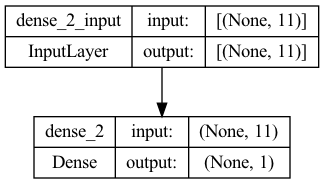

In [17]:
# architecture of the model
plot_model(model_1, show_shapes=True)

<AxesSubplot:>

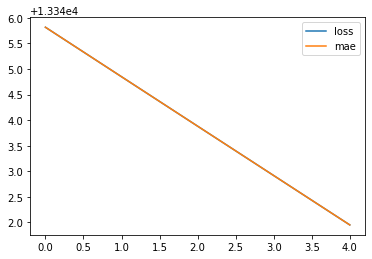

In [19]:
pd.DataFrame(history_1.history).plot()

In [20]:
# 4. Evaluate The Model
model_1.evaluate(X_test, y_test)

9/9 [==============================] - 0s 431us/step - loss: 12963.6934 - mae: 12963.6934


[12963.693359375, 12963.693359375]

Moving on to fifth and final step **5. Improve The Model**, we will try to make improvements to the model by making small adjustments to the model. 

Let's begin by increasing the number of epochs.

In [21]:
# 1. Create The Model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile The Model
model_2.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit The Model
model_2.fit(X_train, y_train, epochs=100, verbose=0)

# 4. Evaluate The Model
history_2 = model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 381us/step - loss: 12871.0127 - mae: 12871.0127


It looks like training for longer improved the model. Now let's again move on to **5. Improve The Model** step by running another experiment in which we will add an extra layer keeping the epochs to 100. 

In [22]:
# 1. Create The Model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile The Model
model_3.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit The Model
model_3.fit(X_train, y_train, epochs=100, verbose=0)

# 4. Evaluate The Model
model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 414us/step - loss: 4509.1230 - mae: 4509.1230


[4509.123046875, 4509.123046875]

It looks like that model_3 has improved significantly over model_2.

## Classification

### Data

In [13]:
# breast cancer dataset to work with
data = load_breast_cancer(as_frame=True)
df = pd.DataFrame(data.data)
df = df.assign(target=pd.Series(data.target))
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [37]:
df.target.value_counts()

1    357
0    212
Name: target, dtype: int64

In [27]:
# features and target
X = df.drop("target", axis=1)
y = df.target

# split in train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

In [15]:
# optional: preprocessing data (for deep learning usually normalization)
column_transformer = make_column_transformer(
    (MinMaxScaler(), df.drop("target", axis=1).columns)
)

# fit the X_train data
column_transformer.fit(X_train)

# transform both X_train and X_test
X_train_normal = column_transformer.transform(X_train)
X_test_normal = column_transformer.transform(X_test)

### Experiments

Now let's go over the 5 fundamental steps.

In [54]:
# reproducibility
tf.random.set_seed(42)

# reproducibility
tf.random.set_seed(42)

# 1. Create The Model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile The Model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit The Model
model_1.fit(X_train, y_train, epochs=5)

Epoch 1/5
15/15 [==============================] - 0s 428us/step - loss: 1129.5483 - accuracy: 0.5451
Epoch 2/5
15/15 [==============================] - 0s 403us/step - loss: 1363.5800 - accuracy: 0.4923
Epoch 3/5
15/15 [==============================] - 0s 478us/step - loss: 1155.0577 - accuracy: 0.5297
Epoch 4/5
15/15 [==============================] - 0s 518us/step - loss: 996.5744 - accuracy: 0.5451
Epoch 5/5
15/15 [==============================] - 0s 428us/step - loss: 978.7729 - accuracy: 0.5231


In [29]:
# summary of the model
model_1.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 1)                 31        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


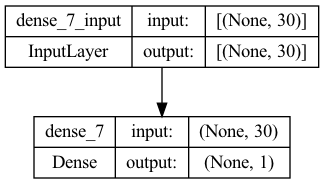

In [30]:
# architecture of the model
plot_model(model_1, show_shapes=True)

In [31]:
# 4. Evaluate The Model
model_1.evaluate(X_test, y_test)

4/4 [==============================] - 0s 658us/step - loss: 6.0225 - accuracy: 0.6053


[6.022518634796143, 0.6052631735801697]

Moving on to fifth and final step **5. Improve The Model**, we will try to make improvements to the model by making small adjustments to the model. 

Let's begin by increasing the number of epochs.

In [52]:
# 1. Create The Model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation="relu")
])

# 2. Compile The Model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["accuracy"])

# 3. Fit The Model
model_2.fit(X_train, y_train, epochs=100, verbose=0)

# 4. Evaluate The Model
model_2.evaluate(X_test, y_test)

4/4 [==============================] - 0s 547us/step - loss: 5.7519 - accuracy: 0.6228


[5.751905918121338, 0.6228070259094238]

It looks like training for longer improved the model. Now let's again move on to **5. Improve The Model** step by running another experiment in which we will add an extra layer keeping the epochs to 100. 

In [58]:
# 1. Create The Model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1, activation="softmax")
])

# 2. Compile The Model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# 3. Fit The Model
model_3.fit(X_train, y_train, epochs=100, verbose=0)

# 4. Evaluate The Model
model_3.evaluate(X_test, y_test)

4/4 [==============================] - 0s 627us/step - loss: 0.2929 - accuracy: 0.6228


[0.2928633391857147, 0.6228070259094238]

In [48]:
y_pred = model_3.predict(X_test)
tf.math.confusion_matrix(y_test, y_pred)

4/4 [==============================] - 0s 587us/step


InvalidArgumentError: `predictions` contains negative values.  
Condition x >= 0 did not hold element-wise:
x (shape=(114,) dtype=int64) = 
['-395', '-1120', '-684', '...']